# Convert embeddings to sqlite

In [170]:
from gensim.models import KeyedVectors
from gensim import models
from IPython.display import Markdown
import pandas as pd
import os

In [171]:
import dhlab.graph_networkx_louvain as gnl
import networkx as nx

from collections import Counter

In [209]:
def check(word, list_of_words, model = None):
    def test(x,y):
        try:
            return model.rank(x,y)
        except:
            return 1000000
    res = {w: test(word, w) for w in list_of_words}
    return pd.DataFrame.from_dict(res, orient='index', columns=[word]).sort_values(by=word)

In [205]:
m = KeyedVectors.load('models/fifth_capital_ddc.kv')

In [213]:
check("ost", "Oslo Trondheim kake pølse".split(), m)

,ost
pølse,63
kake,1078
Trondheim,475005
Oslo,491160


In [212]:
check("pølsebrød", "Oslo Trondheim kake pølse".split(), m)

,pølsebrød
pølse,19785
kake,284402
Trondheim,485406
Oslo,491995


In [206]:
len(m.key_to_index)

503024

In [215]:
%%time
m.most_similar('ost',topn= 20)

CPU times: user 292 ms, sys: 1.54 ms, total: 294 ms
Wall time: 15.5 ms


[('kaviar', 0.8968907594680786),
 ('biff', 0.8962175250053406),
 ('skinke', 0.8959143161773682),
 ('geitost', 0.8950326442718506),
 ('saus', 0.886101245880127),
 ('portvin', 0.8809598684310913),
 ('pasta', 0.8808044791221619),
 ('kylling', 0.8791943192481995),
 ('kjøttdeig', 0.8770521283149719),
 ('potet', 0.8768265843391418),
 ('ansjos', 0.8754181265830994),
 ('brunost', 0.8732015490531921),
 ('koteletter', 0.8721470832824707),
 ('hvitvin', 0.8713891506195068),
 ('bacon', 0.8679360151290894),
 ('sjokolade', 0.8677423000335693),
 ('leverpostei', 0.8662129044532776),
 ('flatbrød', 0.8658556938171387),
 ('sirup', 0.86553555727005),
 ('majones', 0.8634175658226013)]

In [9]:
T = ""
for x in "Himlen Havet Sjøen Øine Haand Aand".split():
    try:
        text = f"### {x} \n {', '.join([x[0] for x in d.most_similar(x, topn=15)])}\n\n"
    except:
        text = f"### {x} \n"
    T += text
    
Markdown(T)
    

### Himlen 
 Himmelen, Skyen, Skyerne, Jorden, Himmel, Ham, Solen, Mørket, Himlene, Lyset, Himlens, Evigheden, Høie, Dybet, Helvede

### Havet 
 Søen, Oceanet, Verdenshavet, Vandet, Bølgerne, Dybet, Bjergene, Sjøen, Floden, Klipperne, Vandene, Kysten, Havfladen, Bjærgene, Sletten

### Sjøen 
 Søen, Isen, Fjorden, Revet, Fjæren, Tjernet, Elven, Stranden, Sjøerne, Fjeldet, Fossen, Skjærene, Baaden, Soen, Havet

### Øine 
 Øjne, Oine, Ojne, Qine, Ansigt, Blikke, ØQine, ØPjne, Aasyn, Øino, Øjno, ØOine, Øren, Ansigter, Ojns

### Haand 
 Arm, Finger, Haaud, Mund, Hænder, Skulder, Hånd, Hagnd, Tommelfinger, Pegefinger, Næve, Arme, Haanden, Albue, Hæl

### Aand 
 Kraft, Sjæl, Tro, Aanden, Sjel, Gjerning, Vilje, Åand, Villie, Kjærlighed, Lære, Fylde, Aaud, Krast, Natur



In [11]:
def make_edges(w, topn=20, visited=None, model = d, level = 0):
    edges = []
    if w not in visited:
        visited.append(w)
        try:
            gdata =  model.most_similar(w, topn=topn)
            edges += [(w, g[0], g[1]) for g in gdata]
            #print(visited)
            if level > 0:
                for g in gdata:
                    l = level - 1
                    edges += make_edges(g[0], topn=topn, visited = visited, level=l)
                    #print(l,edge)
        except:
            pass
            #print("problem", w)
    return edges

def graf(w, model = d, top = 20):
    edges = make_edges(w, topn = top, visited=[], model=model,level = 1)
    G = nx.DiGraph()
    G.add_weighted_edges_from(edges)
    return G

def show_centralities(G, size=10):
    cols = [Counter(nx.betweenness_centrality(G)).most_common(size),
            Counter(nx.degree_centrality(G)).most_common(size),
            Counter(nx.in_degree_centrality(G)).most_common(size),
            Counter(nx.out_degree_centrality(G)).most_common(size)
           ]
    names = ["Betweennes", "Degree", "Indegree", "Outdegree"]
    res = zip(names, cols)
    cents = pd.concat(map(lambda x: pd.DataFrame(x[1], columns =['index', x[0]]).set_index('index'), res), axis = 1)
    return cents

In [197]:
G = graf('Kage',model=d, top=35)

gnl.show_communities(G)

Kage-Skinke :  Kage, Skinke, Postej, Postei, Julekage, Spegesild, Suppe, Pølse, Æggekage, Tærte, Grød, Steg, Tvebak, Oxesteg, Kalvesteg, Likør, Pudding, Grod, Æggeblomme, Budding, Flødegrød, Velling, Risengrød, Havresuppe, Faaresteg, Dessert, Kraftsuppe, Ludefisk, Ertesuppe, Rødvin, Polse, Tykmælk, Lammesteg, Fladbrød, Hvedebrød, Sauce, Gelé, Æblekage, Saus, Spegekjød, Kjødsuppe, Konfekt, Fløde, Dyresteg, Ribsvin, Omelet, Chokolade, Beaf, Peberkage, Karry, Hønsekjødsuppe, Kjødmad, Kjødkraft, Limonade, Syltetøj, Surmelk, Sennep, Chocolade, Karbonade, Fiskesuppe, Marmelade, Lefser, Surkaal, Sirup, Gaasesteg, Suppen, stegt, Lammekjød, suppe, Smørbrød, Oxekjød, Melk, Ølost, Oksekjød, Konjak, Rodvin, Bygsuppe, Cognak, Ansjovis, Frikadeller, Teen, Palmevin, Fiskeboller, Faarekjød, Rødgrød, syltet, Kringler, Oksesteg, Mysost, Kaalsuppe, Rømmegrød, Ragout, Havrebrød, Flæsk, Kjæks, Dejg, Lefse, Risengryn, Kjex, Edik, Kjødret, Gammelost, Rullepølse, Beafsteg, Gelee, Kjeks

Kop-Snaps :  Kop, Snap

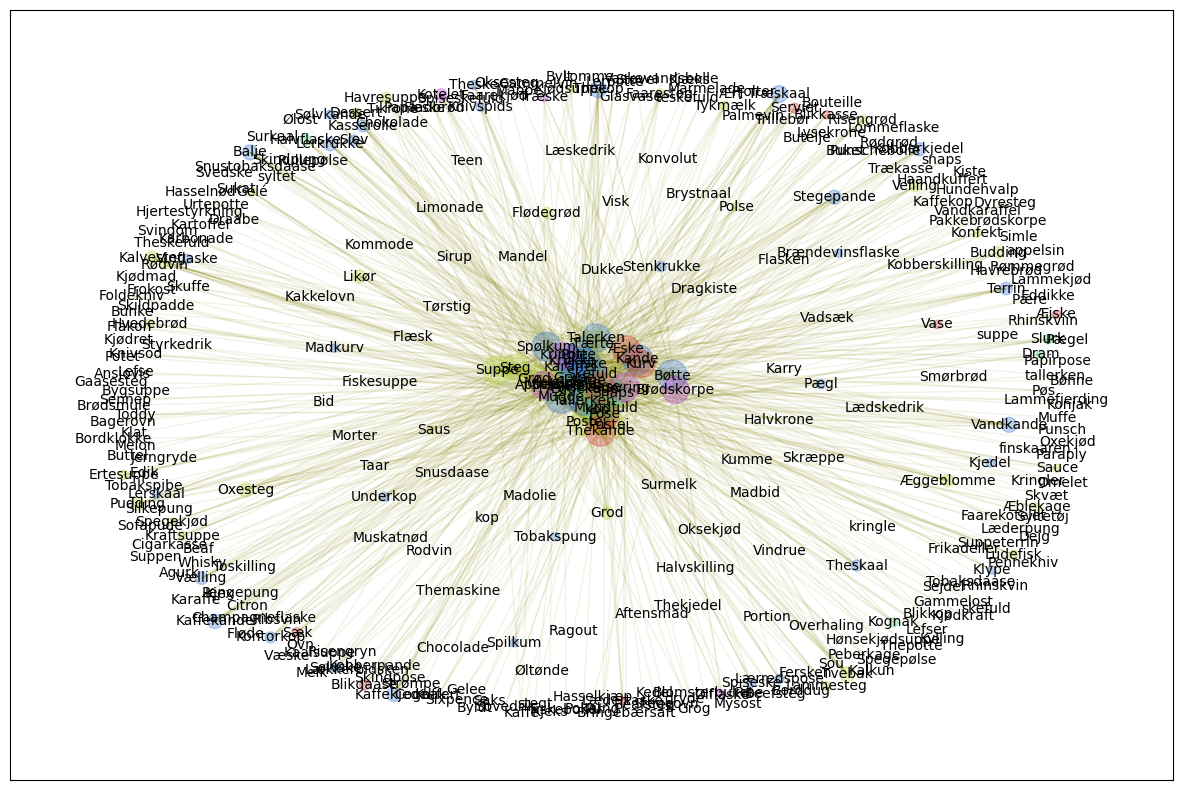

In [204]:
gnl.show_graph(G, spread=0.015)

In [33]:
def combine(words, top = 20, model = None):
    G = nx.DiGraph()
    for w in words:
        G = nx.compose(G, graf(w, model= model,top=top))
    return G

In [67]:
G = combine("Vinskibelighed Vindskibelighed Industri Kunst".split(), model = d, top = 20)

In [51]:
(show_centralities(G, 20).fillna(0)
    .sort_values(by=['Degree','Indegree','Betweennes','Outdegree',], ascending=False)
    .style
    .background_gradient(axis = 1))

,Betweennes,Degree,Indegree,Outdegree
index,,,,
Arbeidsomhed,0.003133,0.080078,0.041016,0.039062
Arbejdsomhed,0.003016,0.078125,0.039062,0.039062
Ordenssands,0.000000,0.074219,0.035156,0.039062
Vindskibelighed,0.006268,0.072266,0.033203,0.039062
Stræbsomhed,0.003616,0.070312,0.031250,0.039062
Driftighed,0.013066,0.068359,0.029297,0.039062
Industri,0.003462,0.068359,0.029297,0.000000
Nøjsomhed,0.000000,0.066406,0.027344,0.039062
Vinskibelighed,0.004128,0.064453,0.025391,0.039062


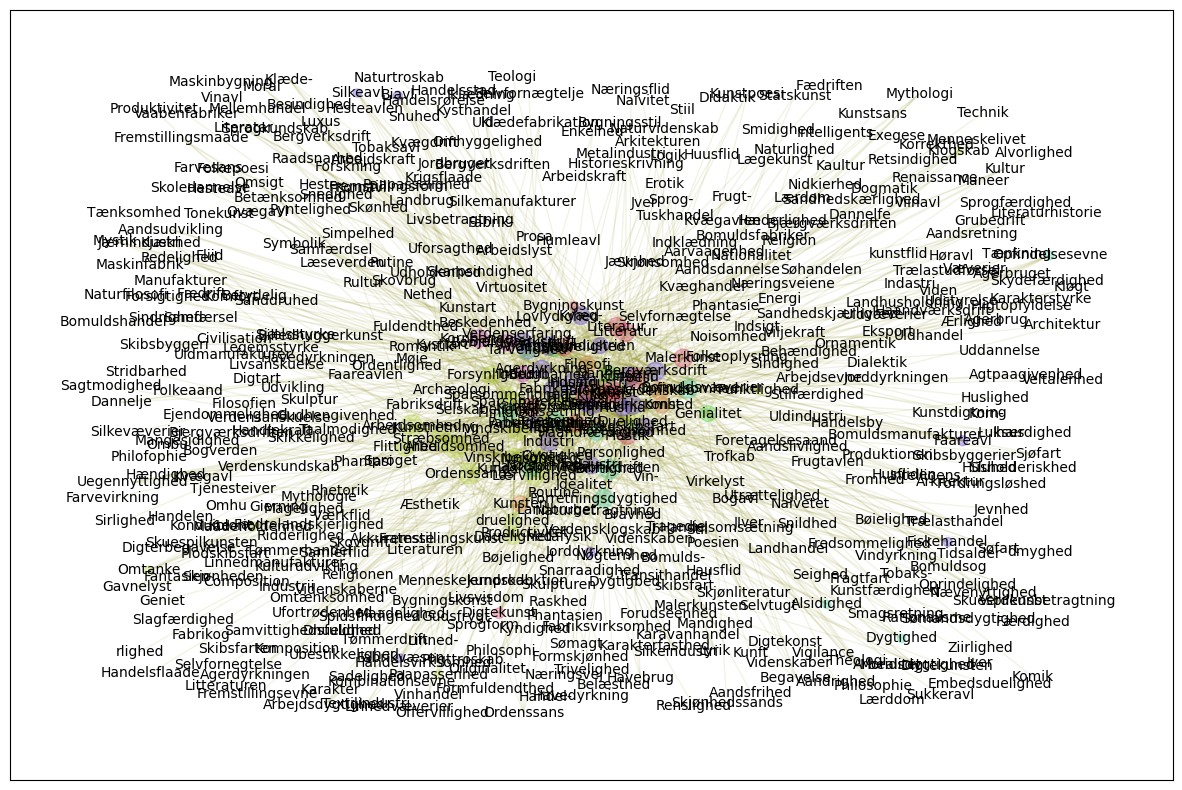

In [52]:
gnl.show_graph(G, spread = 0.003)

In [53]:
gnl.show_communities(G)

Arbeidsomhed-Arbejdsomhed :  Arbeidsomhed, Arbejdsomhed, Ordenssands, Vindskibelighed, Stræbsomhed, Nøjsomhed, Vinskibelighed, Ædruelighed, Sparsomhed, Duelighed, Lærvillighed, Forsynlighed, Nøisomhed, Flittighed, Arbeidssomhed, Sparsommelighed, Retskaffenhed, Flid, Haardførhed, druelighed, Dauelighed, Maadeholdenhed, Omtanke, Klogskab, Punktlighed, Paapassenhed, Ordenssans, Samvittighedsfuldhed, Uegennyttighed, Paapasselighed, Omtænksomhed, Gavnelyst, Bravhed, Akkuratesse, Omsigt, Fredsommelighed, Redelighed, Gudhengivenhed, Pligttroskab, Karakterfasthed, Ufortrødenhed, Fliid, Maadelighed, Husholderiskhed, Skjønsomhed, Kjækhed, Betænksomhed, Konduite, Utrættelighed, Nøgternhed, Ubestikkelighed, Ihærdighed, Øygtighed, Mandighed, Selvtugt, Agtpaagivenhed, Forsigtighed, Lovlydighed, Karakterstyrke, Noisomhed, Embedsduelighed, rlighed, Omhu, Udholdenhed, Skikkelighed, Pligtopfyldelse, Trivelighed, Ærlighed, Vigilance, Kyndighed, Tænksomhed, Sagtmodighed, dmyghed, Besindighed, Iver, Skydef

In [54]:
gnl.show_cliques(G)

(3, 1) Paapasselighed, Omtænksomhed, Sparsommelighed, Ordenssans, Foretagelsesaand, Gavnelyst, Legemsstyrke, Gudhengivenhed, Virtuositet, Husholderiskhed, Omtanke, Belæsthed, Arbeidsomhed, Retskaffenhed, Selvtugt, Bravhed, Nøjsomhed, Nøisomhed, Sindrighed, Agtpaagivenhed, Maadeholdenhed, Raadsnarhed, Fordringsløshed, Forsigtighed, Sparsomhed, Konduite, Opfindelsesevne, Lærenemhed, Opfindsomhed, Flinkhed, Aandslivlighed, Nøgternhed, Skarpsindighed, Akkuratesse, Kundskabsfylde, Virkelyst, Kunst, Flid, Foretagsomhed, Lovlydighed, Flittighed, Vinskibelighed, Vindskibelighed, Haardførhed, Kunstfærdighed, Forretningsdygtighed, Handlekraft, Haandfærdighed, Begavelse, Mangesidighed, Huslighed, Arbeidslyst, Arbeidssomhed, Klogskab, Snarraadighed, Raskhed, druelighed, Tarvelighed, Lærvillighed, Omsigt, Alsidighed, Menneskekundskab, Dauelighed, Samvittighedsfuldhed, Duelighed, Ædruelighed, Dygtighed, Smidighed, Noisomhed, Arbeidsdygtighed, Øygtighed, Ufortrødenhed, Stræbsomhed, Fredsommelighed, D

In [61]:
z = gnl.make_cliques_from_graph(G.to_undirected())[1]

In [63]:
for x in z:
    

(3, 1)
(3, 2)
(3, 3)
(4, 1)
(4, 2)
(4, 3)
(5, 1)
(5, 2)
(5, 3)
(6, 1)
(6, 2)
(6, 3)
(6, 4)
(6, 5)
(7, 1)
(7, 2)
(7, 3)
(8, 1)
(8, 2)
(9, 1)


In [56]:
gnl.make_cliques_from_graph??

Signature: gnl.make_cliques_from_graph(G, lable_num=2)
Docstring: <no docstring>
Source:   
def make_cliques_from_graph(G, lable_num=2):
    ggg = G
    centrals = nx.closeness_centrality(ggg)
    coms = kcliques(ggg)
    sg = subsetgraph(coms, centrals, lable_num)
    return (ggg, coms, sg)
File:      ~/anaconda3/lib/python3.11/site-packages/dhlab/legacy/graph_networkx_louvain.py
Type:      function

In [68]:
Kyst = combine("Kystbyen Kystby".split(), model = d, top = 20)

In [69]:
By = combine("By Byen Byens Byene".split(), model = d, top = 20)

In [71]:
Hus = combine("Hus Huset".split(), model = d, top = 20)

In [127]:
Fjell = combine("Fjell Fjeldet Fjeld fjell fjellet".split(), model = d, top = 20)

In [156]:
gnl.show_communities(Kyst)

Minatitlan-Manyanga :  Minatitlan, Manyanga, Port-Said, Sciacca, Mowa, Kystbyen, Dumo, Matadi, Søhavnen, Sundu, Zayton, Jinretlen, Isangila, Barrowspidsen, Reikialid, Zavod, Bahamasøerne, Purmerend, Naupaktus, Tschadsøen, Bhamo, Stanleydammen, Assiut, Saigun, Pitlekaj, Kagehyi, Reikiavik, Nepoko, Ismailia, Albert-Nyanza, Bjørnegaden, cabello, Erythrai, Kotzebuesundet, Irgunnuk, Ualan, Svjatoinos, Avatschabugten, Mundingsbugt, Jernbanebryggen, Obdorsk, Burntisland, Whampoa, Hiogo, Usavara, Urangi, Magellanstrædet, Sarnia, Chemulpo, Matamoras, Tundjuru, Bortfærden, Bonalya, Kairvan, Aden, Kalamaki, Barquisimeto, Falaise, Southhampton, Iramba, Vangt, Hankow, Chiwyu, Uvinza, Villegiatur, Kastelholmen, Melasø, Albert-søen, Kosseir

Sabinerbjærgene-Kladeos :  Sabinerbjærgene, Kladeos, Albanerbjergene, Apeninerne, Kopaissøen, Abruzzerne, Sabinerbjergene, Boiotien, Østskraaning, Ambrakia, Jurabjergene, Schreckhorn, Albanerbjærgene, Pentelikon, Parnes, Gavarnie, Oeta, Tenos, Puzzuoli, Selinunt,

In [128]:
gnl.show_communities(Fjell)

Tindar-Fjøll :  Tindar, Fjøll, Fossar, Aasar, Nutar, Fjelli, Bylgja, Fjøra, Vollar, Engjer, Votn, Lauv, Toppar, Fjellet, Øyar, Bakkar, Strender, Straum, Fjell, Snjoen, glitrande, Elvar, Bekkjer, haagt, blømande, Lidi, Skuggar, Skodda, Baara, Vindaugo, Elvi, Hamrar, lokkar, Drakar, Skogar, glimande, Baaror, Glasi, Vatnet, Krokar, Draugar, Ringar, Doggi, Holmar, Fjellom, Aakrar, Lauvet, Trei, Straumen, leikande, stengjer, Bergi, Engjar, Straumar, tettbygde, Bekk, Bylgjor, Fjordar, Tuva, Vengjer, Heidar, Skjoldar, Baatar, Røter, snøkvite, Bergom, Taket, symjande, Bjørki, Rosor, øyar, Bakkarne, Fjordarne, Aai, Rosur, Beini, Tufti, Fjellgardar, rjukande, Fuglar, øyarne, Fargar, grøne, Fuglarne, nordanfyre, Deilder, Dogg, Graset, Elden, Imillom, Treet, Røyk, blømer, Blomarne, Kyrfja, Veggjer, lauv, Flaum, Golv, ljomar, Millom, Sjoen, Haugar, Tonarne, Greinom, Daudens, Gneistar, Myrker, Runnar, ovanfyre, Djup, Liki, Panna, Vegg, Engjom, Eple, rotnar, Fiskar, Gruva, sudetter, Aasarne, Sjøar, u

In [70]:
gnl.show_communities(By)

By-Havnestad :  By, Havnestad, Søstad, Flekke, Landsby, Søhavn, Handelsplads, Fabrikby, Koloni, Coloni, Kystby, Provinds, Hovedstad, Stad, Handelsstad, Bydel, Provins, Forstad, Provinsby, Egn, Bjergstad, Øgruppe, Havneby, Havneplads, Krigshavn, Sjøstad, Handelsby, Landstrækning, Søhandelsstad, Fiskerby, Flaadestation, havnestad, Fristat, Sostad, Orlogshavn, Missionsstation, sjøstad, Landsdel, Folkestamme, Republik, Nybygd, Fabrikstad, Bondeby, Vasalstat, Alpesø, Forbundsstat, Forpagtergaard, Kystflod, Nybygger, sjøhandelsstad, Kongeborg, Banegaard, Fjelddal, Orken, Skovegn, Klippeø, handelsstad, Bjergegn, Ørfen, Vicekonge, Flække, Fiskerhytte, Landsdeel, søstad, Ørken, koloni, Trakt, Kongestad, provins, Markedsplads, Landsbykirke, Hovedgade, handelsby, Fyrsteslægt, smaaby, Slette, Bondehytte, Udkant, klippeø, Moské, Region, provinsby, Udhavn, Residents, Gæstgivergaard, Hovedby, Ggn, Bondefamilie, Skovbygd, Drfen, Hovedsiad, Fjeldbygd, Kolonisation, Baggade, Stadsmur, Fabriksby, Pavillo

In [72]:
gnl.show_communities(Hus)

Hus-Sovekammer :  Hus, Sovekammer, Gemak, Soveværelse, Værelse, Dagligværelse, Kammer, Telt, Arbeidsværelse, Paaklædningsværelse, Vaærelse, Værelfe, Modtagelsesværelse, Værelje, Studerekammer, Boudoir, Forværelse, Lukaf, Toiletværelse, Arbejdsværelse, Studerværelse, Studerkammer, Kvistværelse, Vindu, Gjæsteværelse, Vindue, Taarnkammer, Kabinet, Privatkontor, Røgeværelse, Kammers, Venteværelse, Studereværelse, Køkken, Leie, Atelier, Bord

Huus-Huns :  Huus, Huns, Harem, Hnus, Palads, Hns, Pallads, Gravsted, Paulun, Forgemak, Fædrenehjem, Tempel, Højsæde, Sovegemak, Palæ, Sengkammer, Fædrenehus, Bedekammer, Høisæde, Sommerpalads, Alter, Wrinde, Slot, Gravmæle, Fremtidshjem, Fædrenehuus, Lystslot, Jagtslot, Sovekammervindu, Navu, Sengekammer, paulun, Skatkammer, Paulnn, Mausoleum, Serail, Kapel, Vinbjerg, Loftskammer, Nadverbord, Helgenskrin, Huu, Gudshus, Begravelsessted, Gravminde, Panlun, Gravkapel, Barneliv, Kongesæde, Herresæde, Tjenerskab, palads, Taarn, Tabernakel, Skjøod, Yndlings

In [124]:
def check_(word, list_of_words, model = None):
    def test(x,y):
        try:
            return model.rank(x,y)
        except:
            return 1000000
    res = {w: test(word, w) for w in list_of_words}
    return pd.DataFrame.from_dict(res, orient='index', columns=[word]).sort_values(by=word)

In [91]:
def check(target_word, word_list, model = None):
    # Ensure words are in the vocabulary
    #filtered_word_list = [word for word in word_list if word in model.vocab]

    # Calculate similarities
    similarities = model.most_similar(target_word, topn=len(word_list))

    # Sort the similarities
    sorted_similarities = sorted(similarities, key=lambda x: x[1], reverse=True)
    
    return sorted_similarities

In [131]:
pron = "han ham hun henne vi os du deg her der hit dit hertil dertil hin".split()

In [149]:
def check(target, word_list, model):
    Y = word_list
    return pd.DataFrame(list(zip(Y,model.cosine_similarities(model[target], [model[x] for x in Y]))), columns = ["word", target]).sort_values(by=target, ascending = False)


In [132]:
#check_("Paris", pron, model = d)

In [155]:
pd.concat([check(w, ['her','der', "Her",  "Der"], model = d).set_index('word') for w in "Christiania Paris London Stockholm København Suppe Demokrati Aristokrati".split()], axis = 1)

,Christiania,Paris,London,Stockholm,København,Suppe,Demokrati,Aristokrati
word,,,,,,,,
der,0.069897,0.138741,0.079535,0.063343,0.210820,0.121857,0.154882,0.251034
her,0.024981,0.068798,0.095451,0.044914,0.184425,0.141485,0.151733,0.175300
Her,0.006075,0.122632,0.098578,0.080793,0.170417,0.069699,0.108371,0.118370
Der,-0.019848,0.099434,0.043637,0.029704,0.132110,0.087815,0.074350,0.113076


In [153]:
pd.concat([check(w, ['her','der', "Her",  "Der"], model = d).set_index('word') for w in "Stue Stuen Dør Døren ".split()], axis = 1)

,Stue,Stuen,Dør,Døren
word,,,,
her,0.221322,0.222222,0.167530,0.185388
der,0.197863,0.281448,0.221780,0.263040
Her,0.176203,0.129832,0.129486,0.103682
Der,0.141525,0.178625,0.132943,0.133903


In [160]:
scandi = combine("Christiania Stockholm København London Berlin".split(), model = d, top = 20)

In [163]:
len(scandi.nodes())

424

In [168]:
Kystby.nodes()

NameError: name 'Kystby' is not defined

In [164]:
d.most_similar('Mand')

[('Pige', 0.822337806224823),
 ('Kvinde', 0.8219634890556335),
 ('Kone', 0.816278874874115),
 ('Dreng', 0.807681679725647),
 ('Yngling', 0.7791777849197388),
 ('Nand', 0.7703502774238586),
 ('Soldat', 0.7568705081939697),
 ('Dame', 0.7561015486717224),
 ('Gut', 0.7391649484634399),
 ('Olding', 0.738048255443573)]

In [165]:
d.most_similar('ung')

[('attenaarig', 0.8441959619522095),
 ('syttenaarig', 0.7751111388206482),
 ('sekstenaarig', 0.7740973830223083),
 ('nittenaarig', 0.7739883065223694),
 ('femtenaarig', 0.7739174365997314),
 ('halvgammel', 0.7605737447738647),
 ('alderstegen', 0.7580034136772156),
 ('sextenaarig', 0.7576227188110352),
 ('fornem', 0.7515032291412354),
 ('fjortenaarig', 0.7499669194221497)]

In [169]:
Kyst.nodes()

NodeView(('Kystbyen', 'Sabinerbjærgene', 'Nanterre', 'Syracusa', 'NyMexiko', 'Pueblo', 'Mowa', 'Torres-Strædet', 'Launceston', 'Port-Said', 'Sjenin', 'Gabes', 'Tripolitza', 'Sciacca', 'Aigues-Mortes', 'Manyanga', 'Miramichi', 'Minatitlan', 'Kajrasol', 'Gabon', 'Torrevieja', 'Parnes', 'Pentelikon', 'Kladeos', 'Erymanthos', 'Puzzuoli', 'Albanerbjærgene', 'Selinunt', 'Boiotien', 'Østskraaning', 'Albanerbjergene', 'Sabinerbjergene', 'Gavarnie', 'Oeta', 'Abruzzerne', 'Apeninerne', 'Kopaissøen', 'Schreckhorn', 'Ambrakia', 'Tenos', 'Jurabjergene', 'Saint-Gilles', 'Cancello', 'Asnieres', 'Concarneau', 'Fano', 'Chateaudun', 'Burdigala', 'Måcon', 'Ferté-sous-', 'Carcassonne', 'Dauphinée', 'Ruffec', 'Vesoul', 'Aarleang', 'Huntingdonshire', 'Kustendsche', 'Pozzuoli', 'Askra', 'Posilipo', 'Amalfi', 'Catania', 'Palermo', 'Messina', 'Colombo', 'Nauplia', 'Bajæ', 'Kairo', 'Puteoli', 'Cairo', 'Girgenti', 'Terracina', 'Piræus', 'Luxor', 'Rhegium', 'Galata', 'Terni', 'Yokohama', 'Lugano', 'Delhi', 'Gievd